In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 4近傍ラベリング

In [17]:
def labeling(img):
    out_label = np.zeros_like(img)
    H,W = img.shape
    labeling_counter = 0

    # ラスタスキャン
    for y in range(H):
        for x in range(W):
            if img[y,x]==255:
                up_gaso=0
                left_gaso=0
                # 上下の画素を取り出す
                if y!=0:
                    up_gaso = img[y-1,x]

                if x!=0:
                    left_gaso = img[y,x-1]

                # どちらも0のとき
                if max(up_gaso,left_gaso)==0:
                    labeling_counter+=1
                    out_label[y,x]=labeling_counter
                # どちらかが255のとき
                else:
                    left_label=0
                    up_label=0
                    if x!=0:
                        left_label = out_label[y,x-1]
                    if y!=0:
                        up_label = out_label[y-1,x]
                
                    if left_label==0 and up_label!=0:
                        out_label[y,x] = up_label
                    elif up_label==0 and left_label!=0:
                        out_label[y,x] = left_label
                    elif up_label!=0 and left_label!=0:
                        out_label[y,x] = min(up_label,left_label)
                    
    # 隣接しているノードを統合する
    for y in range(H):
        for x in range(W-1):
            left_label = out_label[y,x]
            right_label = out_label[y,x+1]
            if min(left_label,right_label)!=0 and left_label!=right_label:
                out_label[out_label==right_label] = left_label
                labeling_counter-=1
                    
    print("labeling counter : "+str(labeling_counter))
    label_list = np.unique(out_label)

    COLORS = [[0, 0, 255], [0, 255, 0], [255, 0, 0], [255, 255, 0]]
    out = np.zeros((H, W, 3), dtype=np.uint8)

    for i in range(labeling_counter):
        out[out_label == label_list[i+1]] = COLORS[i]
        
    return out_label,out

labeling counter : 4


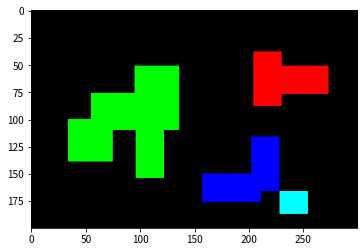

In [18]:
img = cv2.imread("./img/seg.png")
# 1次元にする処理
img = img[:,:,0]

out_label,out = labeling(img)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()